## Load Data Set

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from keras.datasets import cifar100
from keras.utils import to_categorical
import numpy as np
import cv2
import os
from keras import backend as K

In [3]:
(x_train, y_train_), (x_test, y_test_) = cifar100.load_data()


169009152/169001437 [==============================] - 4s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

## Inception V2 model

In [6]:
import keras
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Conv2D, Input
from keras.layers import MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.layers.merge import concatenate
import os

In [7]:
input_shape = (32, 32, 3)
input = Input(shape=input_shape)

In [8]:
layer1_1 = Conv2D(64, (1, 1), activation='elu', padding='same')(input)
layer1_2 = Conv2D(96, (1, 1), activation='elu', padding='same')(input)
layer1_2 = Conv2D(128, (3, 3), activation='elu', padding='same')(layer1_2)
layer1_3 = Conv2D(16, (1, 1), activation='elu', padding='same')(input)
layer1_3 = Conv2D(32, (5, 5), activation='elu', padding='same')(layer1_3)
layer1_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same', data_format='channels_last')(input)
layer1_4 = Conv2D(32, (1, 1), activation='elu', padding='same')(layer1_4)
 
concat = concatenate([layer1_1, layer1_2, layer1_3, layer1_4])

In [9]:
layer2_1 = Conv2D(64, (1, 1), activation='elu', padding='same')(concat)
layer2_2 = Conv2D(96, (1, 1), activation='elu', padding='same')(concat)
layer2_2 = Conv2D(128, (3, 3), activation='elu', padding='same')(layer2_2)
layer2_3 = Conv2D(16, (1, 1), activation='elu', padding='same')(concat)
layer2_3 = Conv2D(32, (5, 5), activation='elu', padding='same')(layer2_3)
layer2_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same', data_format='channels_last')(concat)
layer2_4 = Conv2D(32, (1, 1), activation='elu', padding='same')(layer2_4)

concat2 = concatenate([layer2_1, layer2_2, layer2_3, layer2_4])

In [10]:
layer3_1 = Conv2D(64, (1, 1), activation='elu', padding='same')(concat2)
layer3_2 = Conv2D(96, (1, 1), activation='elu', padding='same')(concat2)
layer3_2 = Conv2D(128, (3, 3), activation='elu', padding='same')(layer3_2)
layer3_3 = Conv2D(16, (1, 1), activation='elu', padding='same')(concat2)
layer3_3 = Conv2D(32, (5, 5), activation='elu', padding='same')(layer3_3)
layer3_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same', data_format='channels_last')(concat2)
layer3_4 = Conv2D(32, (1, 1), activation='elu', padding='same')(layer3_4)
 
concat3 = concatenate([layer3_1, layer3_2, layer3_3, layer3_4])

In [11]:
layer4_1 = Conv2D(64, (1, 1), activation='elu', padding='same')(concat3)
layer4_2 = Conv2D(96, (1, 1), activation='elu', padding='same')(concat3)
layer4_2 = Conv2D(128, (3, 3), activation='elu', padding='same')(layer4_2)
layer4_3 = Conv2D(16, (1, 1), activation='elu', padding='same')(concat3)
layer4_3 = Conv2D(32, (5, 5), activation='elu', padding='same')(layer4_3)
layer4_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same', data_format='channels_last')(concat3)
layer4_4 = Conv2D(32, (1, 1), activation='elu', padding='same')(layer4_4)
 
concat4 = concatenate([layer4_1, layer4_2, layer4_3, layer4_4])

output = Conv2D(8, (3, 3), activation='elu', padding='same')(concat4)
output = MaxPooling2D(pool_size=(3, 3))(output)
output = Flatten()(output)                 
output = Dense(100, activation='softmax')(output) 

model = Model(inputs=input, outputs=output) 
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 96)   384         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 16)   64          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 3)    0           input_1[0][0]                    
_______________________________________________________________________________________

In [12]:
opt = keras.optimizers.SGD(learning_rate=0.001, clipnorm=5)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=["accuracy"])

In [13]:
callback = EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test), callbacks=[callback])
model.save_weights(filepath=F"/content/gdrive/My Drive/Checkpoints/Inception_SGD_NoRegularization.h5")

Epoch 1/100
391/391 [==============================] - 50s 129ms/step - loss: 4.6006 - accuracy: 0.0116 - val_loss: 4.5906 - val_accuracy: 0.0121
Epoch 2/100
391/391 [==============================] - 50s 127ms/step - loss: 4.5807 - accuracy: 0.0149 - val_loss: 4.5732 - val_accuracy: 0.0190
Epoch 3/100
391/391 [==============================] - 50s 127ms/step - loss: 4.5605 - accuracy: 0.0190 - val_loss: 4.5504 - val_accuracy: 0.0217
Epoch 4/100
391/391 [==============================] - 49s 127ms/step - loss: 4.5330 - accuracy: 0.0226 - val_loss: 4.5213 - val_accuracy: 0.0273
Epoch 5/100
391/391 [==============================] - 49s 126ms/step - loss: 4.4995 - accuracy: 0.0266 - val_loss: 4.4896 - val_accuracy: 0.0278
Epoch 6/100
391/391 [==============================] - 50s 127ms/step - loss: 4.4649 - accuracy: 0.0284 - val_loss: 4.4546 - val_accuracy: 0.0314
Epoch 7/100
391/391 [==============================] - 49s 126ms/step - loss: 4.4320 - accuracy: 0.0307 - val_loss: 4.4231 -

## Test Metrics

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


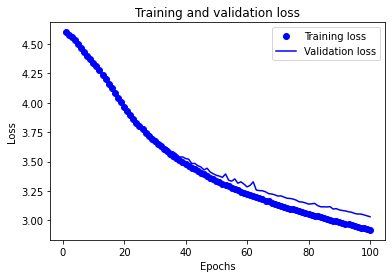

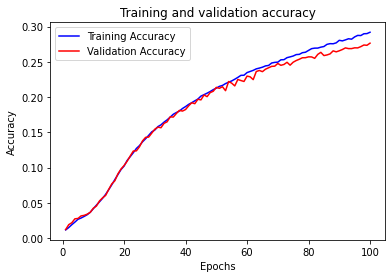

In [14]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
train_acc = history_dict['accuracy']
test_acc = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt2.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt2.plot(epochs, test_acc, color = 'red', label='Validation Accuracy')
plt2.title('Training and validation accuracy')
plt2.xlabel('Epochs')
plt2.ylabel('Accuracy')
plt2.legend()

plt2.show()

In [15]:
y_pred = model.predict(x_test).argmax(-1)
import sklearn.metrics as metrics
print(metrics.classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56       100
           1       0.36      0.33      0.35       100
           2       0.19      0.11      0.14       100
           3       0.13      0.09      0.11       100
           4       0.07      0.08      0.07       100
           5       0.18      0.22      0.20       100
           6       0.33      0.27      0.30       100
           7       0.25      0.25      0.25       100
           8       0.25      0.32      0.28       100
           9       0.47      0.36      0.41       100
          10       0.19      0.10      0.13       100
          11       0.23      0.09      0.13       100
          12       0.25      0.24      0.24       100
          13       0.24      0.22      0.23       100
          14       0.15      0.13      0.14       100
          15       0.17      0.14      0.15       100
          16       0.33      0.16      0.22       100
          17       0.37    

## TESTS

In [16]:
# model.load_weights(filepath=F"/content/gdrive/My Drive/Checkpoints/Inception_SGD_NoRegularization.h5")

model.load_weights("Inception_SGD_NoRegularization.h5")

In [17]:
result = model.evaluate(batch_size=128, x=x_test, y=y_test)
dict(zip(model.metrics_names,result))

79/79 [==============================] - 3s 39ms/step - loss: 3.0314 - accuracy: 0.2764


{'accuracy': 0.27639999985694885, 'loss': 3.031393527984619}